In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [3]:
np.random.seed(42)
from sklearn.metrics import confusion_matrix

In [153]:
import tensorflow as tf
import keras
 
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [21]:
df = pd.read_csv(r"C:\Users\srija\Assignment\AI_ML_GC\aiml-general-championship\KCDH2024_Training_GroundTruth.csv")

In [22]:
df

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0,1,0,0,0,0,0
1,ISIC_0024307,0,1,0,0,0,0,0
2,ISIC_0024308,0,1,0,0,0,0,0
3,ISIC_0024309,0,1,0,0,0,0,0
4,ISIC_0024310,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1,0,0,0,0,0,0
10011,ISIC_0034317,1,0,0,0,0,0,0
10012,ISIC_0034318,0,0,0,0,1,0,0
10013,ISIC_0034319,0,1,0,0,0,0,0


In [4]:
imageID =  df['image']

In [5]:
imageID

0        ISIC_0024306
1        ISIC_0024307
2        ISIC_0024308
3        ISIC_0024309
4        ISIC_0024310
             ...     
10010    ISIC_0034316
10011    ISIC_0034317
10012    ISIC_0034318
10013    ISIC_0034319
10014    ISIC_0034320
Name: image, Length: 10015, dtype: object

In [6]:
image_path = []

In [7]:
base_path = r"C:\Users\srija\Assignment\AI_ML_GC\aiml-general-championship\KCDH2024_Training_Input_10K\KCDH2024_Training_Input_10K"
true_path = os.path.join(base_path,imageID[0]+".jpg")
true_path

'C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10K\\ISIC_0024306.jpg'

In [8]:
img = Image.open(true_path)

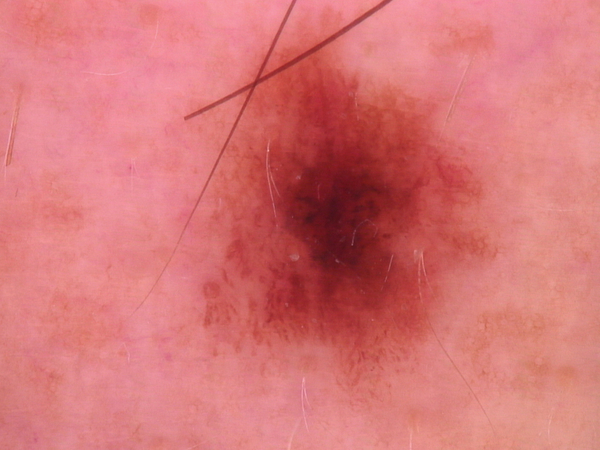

In [9]:
img

In [10]:
for elem in imageID:
    path = os.path.join(base_path,elem +".jpg")
    image_path.append(path)

In [11]:
image_path

['C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10K\\ISIC_0024306.jpg',
 'C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10K\\ISIC_0024307.jpg',
 'C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10K\\ISIC_0024308.jpg',
 'C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10K\\ISIC_0024309.jpg',
 'C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10K\\ISIC_0024310.jpg',
 'C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10K\\ISIC_0024311.jpg',
 'C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10

In [12]:
len(image_path)

10015

In [13]:
len(imageID)

10015

In [14]:
image_path[10014]

'C:\\Users\\srija\\Assignment\\AI_ML_GC\\aiml-general-championship\\KCDH2024_Training_Input_10K\\KCDH2024_Training_Input_10K\\ISIC_0034320.jpg'

In [15]:
imageID[10014]

'ISIC_0034320'

In [23]:
df1  = pd.DataFrame(image_path, columns =['path'])
# new_column_series = pd.Series(image_path)


# df = pd.concat([df, new_column_series], names=['Path'],axis=1)


In [24]:
df1

,path
0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
1,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
2,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
3,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
4,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
...,...
10010,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
10011,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
10012,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
10013,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...


In [25]:
newdf = pd.concat([df,df1],axis=1)

In [26]:
newdf

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,path
0,ISIC_0024306,0,1,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
1,ISIC_0024307,0,1,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
2,ISIC_0024308,0,1,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
3,ISIC_0024309,0,1,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
4,ISIC_0024310,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
...,...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
10011,ISIC_0034317,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
10012,ISIC_0034318,0,0,0,0,1,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
10013,ISIC_0034319,0,1,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...


In [27]:
for i in range(0,len(newdf['path'])):
    try:
        imag1 = Image.open(newdf['path'][i])
    except:
        newdf.drop(i,axis=0,inplace=True)

len(newdf)


9600

In [28]:
list_of_counts = [0,0,0,0,0,0,0] 
## lst[0] =count of MEL
## lst[1] =count of NV and so on

list_of_counts[6]

0

In [29]:
for i in range(0,len(newdf['image'])):
    if(newdf['MEL'][i]==1):
        list_of_counts[0]+=1;
    if(newdf['NV'][i]==1):
        list_of_counts[1]+=1;
    if(newdf['BCC'][i]==1):
        list_of_counts[2]+=1;
    if(newdf['AKIEC'][i]==1):
        list_of_counts[3]+=1;
    if(newdf['BKL'][i]==1):
        list_of_counts[4]+=1;
    if(newdf['DF'][i]==1):
        list_of_counts[5]+=1;
    if(newdf['VASC'][i]==1):
        list_of_counts[6]+=1;
        
        

In [30]:
list_of_counts

[1015, 6457, 495, 327, 1055, 113, 138]

In [31]:
df_0 = newdf[newdf['MEL'] == 1]
df_1 = newdf[newdf['NV'] == 1]
df_2 = newdf[newdf['BCC'] == 1]
df_3 = newdf[newdf['AKIEC'] == 1]
df_4 = newdf[newdf['BKL'] == 1]
df_5 = newdf[newdf['DF'] == 1]
df_6 = newdf[newdf['VASC'] == 1]

In [32]:
len(df_0)

1015

In [33]:
len(df_1)

6457

In [34]:
from sklearn.utils import resample
n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [35]:
df_0_balanced

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,path
1144,ISIC_0025450,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
5010,ISIC_0029316,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
8920,ISIC_0033226,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
3046,ISIC_0027352,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
1194,ISIC_0025500,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
...,...,...,...,...,...,...,...,...,...
9446,ISIC_0033752,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
1861,ISIC_0026167,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
2898,ISIC_0027204,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
3750,ISIC_0028056,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...


In [36]:
df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])


In [37]:
len(df_balanced)

3500

In [40]:
SIZE =224

df_balanced['skin_image'] = df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


In [41]:
df_balanced

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,path,skin_image
1144,ISIC_0025450,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[194, 170, 216], [194, 166, 214], [193, 164,..."
5010,ISIC_0029316,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[223, 167, 159], [221, 167, 155], [224, 172,..."
8920,ISIC_0033226,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[133, 110, 129], [136, 111, 130], [139, 114,..."
3046,ISIC_0027352,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[17, 3, 2], [13, 1, 1], [10, 0, 1], [8, 0, 1..."
1194,ISIC_0025500,1,0,0,0,0,0,0,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[162, 136, 131], [161, 132, 130], [165, 135,..."
...,...,...,...,...,...,...,...,...,...,...
3597,ISIC_0027903,0,0,0,0,0,0,1,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[173, 173, 172], [176, 176, 174], [178, 178,..."
8561,ISIC_0032867,0,0,0,0,0,0,1,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[19, 16, 13], [21, 18, 13], [23, 20, 16], [2..."
96,ISIC_0024402,0,0,0,0,0,0,1,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[175, 152, 173], [179, 154, 176], [184, 158,..."
938,ISIC_0025244,0,0,0,0,0,0,1,C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...,"[[[202, 149, 174], [203, 151, 174], [205, 156,..."


In [42]:
selected_columns = ['MEL', 'NV', 'BCC','AKIEC','BKL','DF','VASC']  # List of columns you want to select
Y_df = df_balanced.loc[:, selected_columns]

In [43]:
Y_df

,MEL,NV,BCC,AKIEC,BKL,DF,VASC
1144,1,0,0,0,0,0,0
5010,1,0,0,0,0,0,0
8920,1,0,0,0,0,0,0
3046,1,0,0,0,0,0,0
1194,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
3597,0,0,0,0,0,0,1
8561,0,0,0,0,0,0,1
96,0,0,0,0,0,0,1
938,0,0,0,0,0,0,1


In [137]:
X = np.asarray(df_balanced['skin_image'].tolist())
X=X/255
X

array([[[[0.76078431, 0.66666667, 0.84705882],
         [0.77647059, 0.69411765, 0.87843137],
         [0.76862745, 0.67058824, 0.87058824],
         ...,
         [0.76862745, 0.69019608, 0.8745098 ],
         [0.76078431, 0.67843137, 0.86666667],
         [0.74901961, 0.66666667, 0.85882353]],

        [[0.76078431, 0.66666667, 0.85490196],
         [0.77647059, 0.68235294, 0.86666667],
         [0.78039216, 0.69019608, 0.88235294],
         ...,
         [0.77647059, 0.70588235, 0.88627451],
         [0.76862745, 0.69411765, 0.88235294],
         [0.76078431, 0.67843137, 0.8745098 ]],

        [[0.76862745, 0.67843137, 0.87058824],
         [0.78039216, 0.69411765, 0.88627451],
         [0.78431373, 0.70196078, 0.89411765],
         ...,
         [0.78039216, 0.71764706, 0.89803922],
         [0.78039216, 0.70980392, 0.89411765],
         [0.76078431, 0.67058824, 0.86666667]],

        ...,

        [[0.77254902, 0.69803922, 0.86666667],
         [0.77254902, 0.69411765, 0.86666667]

In [165]:
type(X)

numpy.ndarray

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_df, test_size=0.25, random_state=42)

In [176]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# num_classes = 7

# model = Sequential()
# model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
# #model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2))) 



# model.add(Conv2D(128, (3, 3),activation='relu'))
# #model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))  


# model.add(Conv2D(64, (3, 3),activation='relu'))
# #model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))  

# model.add(Flatten())

# model.add(Dense(32))
# model.add(Dense(7, activation='softmax'))
# model.summary()

# model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


In [177]:
# from tensorflow.keras.backend import get_value
# batch_size = 16 
# epochs = 50

# history = model.fit(
#     x_train, y_train,
#     epochs=epochs,
#     batch_size = batch_size,
#     validation_data=(x_test, y_test),
#     )

# score = model.evaluate(x_test, y_test)
# print('Test accuracy:', score[1])

In [178]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models
# base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# x = base_model.output
# x = layers.GlobalAveragePooling2D()(x)
# predictions = layers.Dense(num_classes, activation='softmax')(x)

# model = models.Model(inputs=base_model.input, outputs=predictions)

# # Step 3: Compile your model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Step 4: Train your model
# model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Step 5: Evaluate your model
# # Assuming you have X_test (numpy array of test images) and y_test (one-hot encoded labels)
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print('Test accuracy:', test_acc)

In [47]:
dataset

In [48]:
dataloader

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = model.to(device)

In [52]:
print(device)

cpu


In [64]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np

In [97]:
image_paths = image_paths.tolist()

In [102]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        label = self.labels[idx]

        return img, label

In [68]:
df_balanced['path']

1144    C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
5010    C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
8920    C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
3046    C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
1194    C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
                              ...                        
3597    C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
8561    C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
96      C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
938     C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
5583    C:\Users\srija\Assignment\AI_ML_GC\aiml-genera...
Name: path, Length: 3500, dtype: object

In [103]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to desired size
    transforms.ToTensor(),           # Convert PIL Image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

In [105]:
type(np.array(Y_df))

numpy.ndarray

In [106]:
# image_paths = df_balanced['path']
# image_paths
# Assuming labels are already one-hot encoded, for example, 3 classes
labels = np.array(Y_df)

labels = torch.tensor(labels)

In [107]:
labels

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1]])

In [108]:
type(image_paths)

list

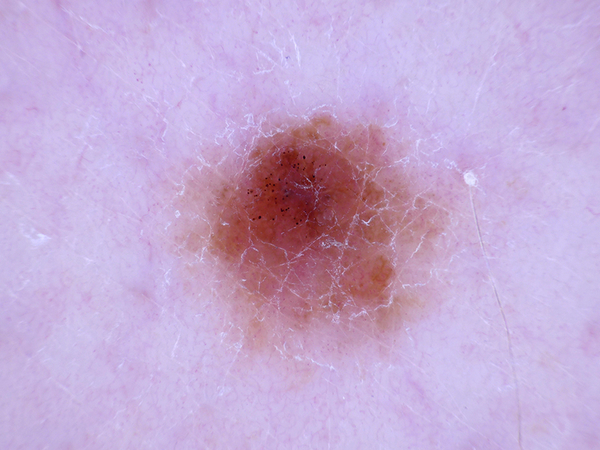

In [109]:
img = Image.open(image_paths[0]).convert("RGB")
img

In [110]:
type(labels)

torch.Tensor

In [111]:
dataset = CustomDataset(image_paths, labels, transform=transform)

In [112]:
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [113]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim

In [114]:
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

In [115]:
num_classes = 7  # Change this according to your number of classes
model = ResNetModel(num_classes)

In [116]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [119]:
num_epochs = 50
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

cpu


In [122]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for index , (images, labels) in enumerate(dataloader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        print(running_loss /((index + 1) * 32) )
    
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

0.28535816073417664
0.3113810569047928
0.3191066086292267
0.3383467271924019
0.33256226778030396
0.3338733712832133
0.33122861811092924
0.32716552540659904
0.3237268924713135
0.3281003087759018
0.3209468966180628
0.320321686565876
0.32093341992451596
0.3225858786276409
0.328210989634196
0.3264757804572582
0.325991351814831
0.32822882963551414
0.3269900758015482
0.32664548307657243
0.3244995829604921
0.3215413269671527
0.31999987622965936
0.31993203113476437
0.3172562801837921
0.31696864045583284
0.31562597221798366
0.31392240098544527
0.3121052651569761
0.31083615819613136
0.31023150490176293
0.30888424534350634
0.3098078099164096
0.3078411909587243
0.3059816973549979
0.30465324140257305
0.30595138427373525
0.3043141639546344
0.30285446422222334
0.30279039703309535
0.30240229317327827
0.3021501668152355
0.30166572574959244
0.3012812086804347
0.30011127359337275
0.2994984961722208
0.29999835028293287
0.2995683864379923
0.2980481912286914
0.29681677252054217
0.2969229358668421
0.29549651

KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(), 'resnet_model.pth')